In [1]:
import numpy as np
import pandas as pd
from mcspace.utils import pickle_load, pickle_save
import matplotlib.pyplot as plt
import seaborn as sns
from mcspace.data_utils import get_human_timeseries_dataset, get_mouse_diet_perturbations_dataset
import scipy
from scipy.stats import nbinom
import statsmodels.api as sm
from pathlib import Path 

# Paths

In [2]:
rootpath = Path("../../")
basepath = rootpath / "paper_cluster" / "semi_synthetic_data"

# Load human dataset

In [3]:
reads, num_otus, times, subjects, dataset = get_human_timeseries_dataset(rootpath=rootpath)

c:\users\gary2\dropbox (partners healthcare)\research_bwh\mcspace\mcspace\mcspace\dataset.py:20: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)


In [4]:
print(times)
print(subjects)

[1 2 3 4 5]
['H11']


In [5]:
t = times[0]
s = subjects[0]
counts = reads[t][s]

In [6]:
num_particles, num_otus = counts.shape

## fit negbin

In [7]:
rdepth = counts.sum(axis=1)
X = np.ones_like(rdepth)
res = sm.NegativeBinomial(rdepth,X).fit(start_params=[1,1])
mu = np.exp(res.params[0])
p = 1/(1+mu*res.params[1])
n = mu*p/(1-p)

Optimization terminated successfully.
         Current function value: 8.891051
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27


In [8]:
print(p)
print(n)

0.000792590089298642
2.5824423545202304


### plot fit

In [9]:
minr = np.amin(rdepth)
maxr = np.amax(rdepth)
print(minr)
print(maxr)

1000.0
9973.0


C:\Users\Gary2\AppData\Local\Temp\ipykernel_3688\1574519796.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(rdepth, kde=False, norm_hist=True, label='Data')


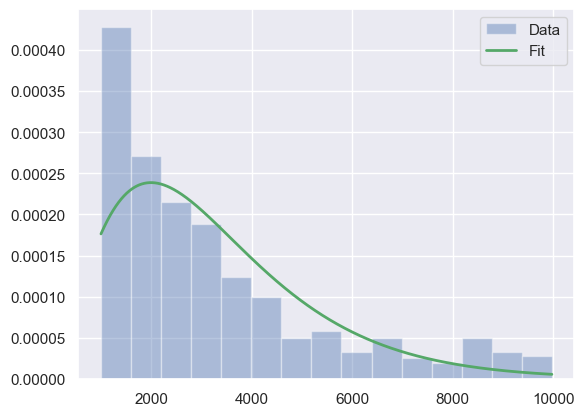

In [10]:
x_plot = np.linspace(minr,maxr,int(maxr-minr)+1)
sns.set_theme()
ax=sns.distplot(rdepth, kde=False, norm_hist=True, label='Data')
ax.plot(x_plot, nbinom.pmf(x_plot, n, p), 'g-', lw=2, label='Fit')
ax.legend()

In [11]:
median = np.median(rdepth)
iqr = np.percentile(rdepth, q=75) - np.percentile(rdepth, q=25) 

In [12]:
print(median)
print(iqr)

2532.0
2634.0


## save results

In [13]:
pickle_save(basepath / "negbin_fit_params_Human_data.pkl", {'negbin_n': n, 'negbin_p': p, 'median': median, 'iqr': iqr,
                                                           "num_particles": num_particles, "num_otus": num_otus})